In [1]:
from psisim import telescope,instrument,observation,spectrum,universe,plots
import numpy as np
import matplotlib.pyplot as plt
import copy
import time
from astropy.io import fits
import astropy.units as u
import pysynphot as ps

/home/sofiah/anaconda3/lib/python3.9/site-packages/pysynphot/locations.py:46: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/home/sofiah/anaconda3/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


Tried importing picaso, but couldn't do it


# Run simulation, write GPIESYield.py and PlanetTables.txt

In [2]:
# file = open('PlanetTables.txt', 'w')
# file.close()
# file = open('GPIESYields.txt', 'w')
# file.close()

with open('GPIESYields.txt', 'a') as file:
    file.write('Run #\tTotal\tIn range\tDetected\n')
with open('PlanetTables.txt', 'a') as file:
    file.write('Name\tDist pc\tStarSpT\tAngSep "\tSMA AU\tJup Mass\tStarImag\tStarHmag\tAge Myr\tSol Mass\tAOmag\tDetected\tContrast\tDet Lim\n')

for i in range(50):
    if i in [x*10 for x in range(120)]:
        print(i)
    with open('GPIESYields.txt', 'a') as file:
        file.write('{0:.0f}'.format(i+1))
    %run ./GPIESYieldCalc.py

0
10
20
30
40


# Plot GPIESYields.txt data

In [3]:
total = []
detectable = []
detected = []
planet_nums = np.loadtxt("./GPIESYields.txt", dtype = float, skiprows = 2)
for run in planet_nums:
    total += [run[1]]
    detectable += [run[2]]
    detected += [run[3]]

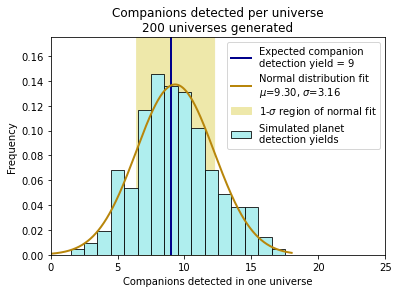

In [23]:
import matplotlib.pyplot as plt
plt.title('Companions detected per universe\n200 universes generated',size = 12)
plt.xlabel('Companions detected in one universe', size = 10)
plt.ylabel('Frequency', size = 10)
def normal(x,mu,sigma):
    return np.exp(-.5*((x-mu)/sigma)**2)/(sigma*np.sqrt(2*np.pi))
plt.hist(detected, bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5], color = 'paleturquoise', edgecolor='black', linewidth=.8,density = True)
plt.plot([9 for x in np.linspace(0,.18,2)],np.linspace(0,.18,2),color = 'darkblue',linewidth = 2)

plt.plot(np.linspace(0,18,1000),[normal(x,9.30,2.91) for x in np.linspace(0,18,1000)],color = 'darkgoldenrod',linewidth = 2)
plt.fill_between(np.linspace(9.30-2.91,9.30+2.91,1000),[.2 for x in np.linspace(9.30-2.91,9.30+2.91,1000)],color = 'palegoldenrod')
plt.ylim(0,.175)
plt.xlim(0,25)
plt.legend(["Expected companion\ndetection yield = 9","Normal distribution fit\n$\mu$=9.30, $\sigma$=3.16","1-$\sigma$ region of normal fit","Simulated planet\ndetection yields"],fontsize = '10')

In [7]:
print(np.mean(detected))
print(np.median(detected))
print(np.std(detected))

9.300970873786408
9.0
2.912427177993096


Text(0, 0.5, 'Frequency')

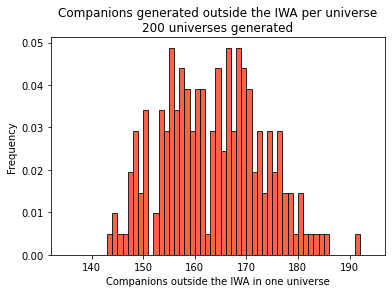

In [22]:
plt.hist(detectable, bins = [x+135 for x in range(60)], color = 'tomato', edgecolor='black', linewidth=.8,density = True)
plt.title('Companions generated outside the IWA per universe\n200 universes generated',size = 12)
plt.xlabel('Companions outside the IWA in one universe',size = 10)
plt.ylabel('Frequency',size = 10)

In [9]:
print(np.mean(detectable))
print(np.median(detectable))
print(np.std(detectable))

162.89805825242718
163.0
9.762435242329872


Text(0, 0.5, 'Frequency')

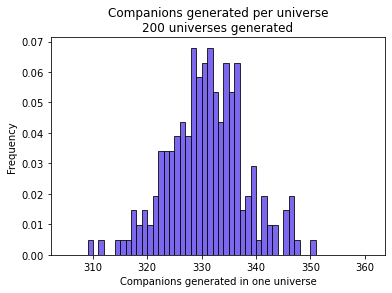

In [21]:
plt.hist(total, bins = [x+305 for x in range(57)], color = 'mediumslateblue', edgecolor='black', linewidth=.8, density = True)
plt.title('Companions generated per universe\n200 universes generated',size = 12)
plt.xlabel('Companions generated in one universe',size =10)
plt.ylabel('Frequency',size =10)

In [11]:
print(np.mean(total))
print(np.median(total))
print(np.std(total))

330.3932038834951
330.0
7.0480839803015245


# Plot PlanetTables.txt

In [14]:
AngSep = []
SMA_detected = []
SMA_total = []
PlanetMass_detected = []
PlanetMass_total = []
contrast = []
detected_bool = []
planet_nums = np.loadtxt("./PlanetTables.txt", dtype = str, skiprows = 1, delimiter = '\t')
for run in planet_nums:
    contrast += [float(run[12])]
    AngSep += [float(run[3])]
    SMA_total += [float(run[4])]
    detected_bool += [run[11]]
    PlanetMass_total += [float(run[5])]
    if run[11] == 'True': 
        SMA_detected += [float(run[4])]
        PlanetMass_detected += [float(run[5])]

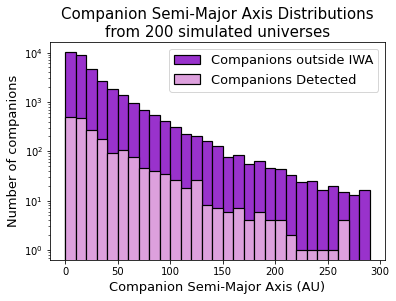

In [20]:
plt.hist(SMA_total, bins = [x*10 for x in range(30)], color = 'darkorchid', edgecolor='black', linewidth=1.2)
plt.hist(SMA_detected, bins = [x*10 for x in range(30)], color = 'plum', edgecolor='black', linewidth=1.2)
plt.title('Companion Semi-Major Axis Distributions\nfrom 200 simulated universes', size = 15)
plt.xlabel('Companion Semi-Major Axis (AU)',size = 13)
plt.ylabel('Number of companions',size = 13)
plt.yscale('log')
plt.legend(["Companions outside IWA","Companions Detected"],fontsize = '13')


In [16]:
browndwarfs = 0
planets = 0
for i in PlanetMass_detected:
    if i > 13:
        browndwarfs += 1
    else:
        planets += 1
print(browndwarfs/len(detected))
print(planets/len(detected))

3.7766990291262137
5.558252427184466


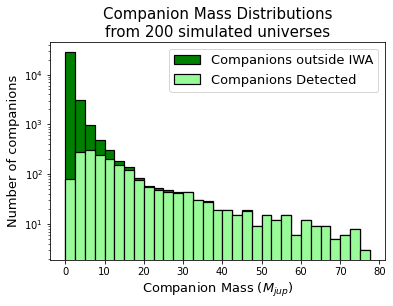

In [19]:
plt.hist(PlanetMass_total, bins = [x*2.5 for x in range(32)], color = 'green', edgecolor='black', linewidth=1.2)
plt.hist(PlanetMass_detected, bins = [x*2.5 for x in range(32)], color = 'palegreen', edgecolor='black', linewidth=1.2)
plt.title('Companion Mass Distributions\nfrom 200 simulated universes',size = 15)
plt.xlabel('Companion Mass ($M_{jup}$)',size = 13)
plt.ylabel('Number of companions',size = 13)
plt.yscale('log')
plt.legend(["Companions outside IWA","Companions Detected"],fontsize = '13')

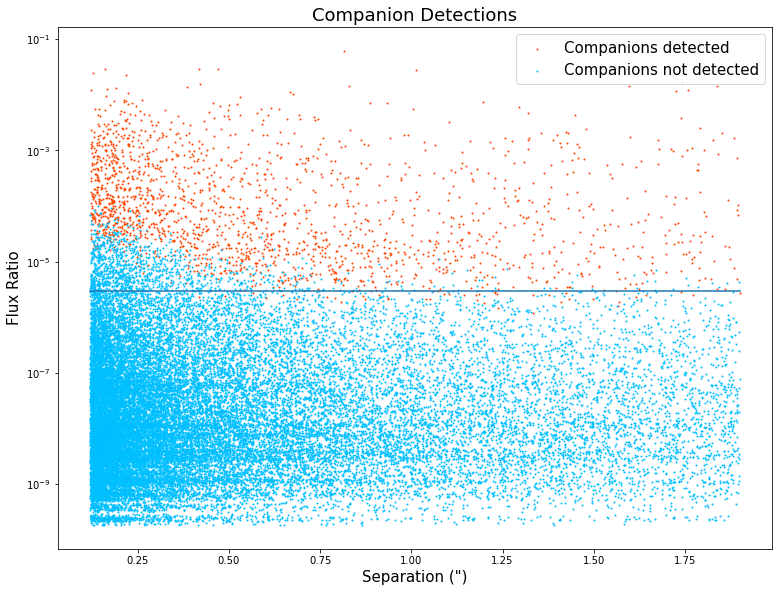

In [18]:
plt.figure(figsize = [12.8, 9.6])

true_contrast = []
true_AngSep = []
false_contrast = []
false_AngSep = []
for i in range(len(contrast)):
    if detected_bool[i] == 'True':
        true_contrast += [contrast[i]]
        true_AngSep += [AngSep[i]]
    else:
        false_contrast += [contrast[i]]
        false_AngSep += [AngSep[i]]
plt.scatter(true_AngSep, true_contrast, color = 'orangered', marker = 'o', s = 1)
plt.scatter(false_AngSep, false_contrast, color = 'deepskyblue', marker = 'o', s = 1)
# plt.xscale('log')
plt.yscale('log')
plt.title('Companion Detections',size = 18)
plt.xlabel('Separation (")',size = 15)
plt.ylabel('Flux Ratio', size = 15)
plt.legend(["Companions detected", "Companions not detected"], loc='upper right',fontsize=15)
plt.plot(np.linspace(.12,1.9,4),[3e-6 for x in np.linspace(.12,1.9,4)])